# Big-O Notation: Plots

The purpose of this notebook is to visualize the order of growth of some functions used frequently in the algorithm analysis. Note that this is an interactive notebook meaning that besides of just running all the code below you may also fool around with it. Try to plug in you favorite functions and/or change the ranges below and see what happens. Proceed by repeatedly clicking the Run button. To start over, select Kernel -> Restart and Clear Output.

## Definitions

We start by reminding the definitions. Consider two functions $f(n)$ and $g(n)$ that are defined for all positive integers and take on non-negative real values. (Some frequently used functions used in algorithm design: $\log n$, $\sqrt{n}$, $n\log n$, $n^3$, $2^n$). We say that **$f$ grows slower than $g$** and write $f \prec g$, if $\frac{f(n)}{g(n)}$ goes to 0 as $n$ grows. We say that **$f$ grows no faster than $g$** and write $f \preceq g$, if there exists a constant $c$ such that $f(n) \le c \cdot g(n)$ for all $n$.

Three important remarks.
1. $f \prec g$ is the same as $f=o(g)$ (small-o) and $f \preceq g$ is the same as $f=O(g)$ (big-O). In this notebook, we've decided to stick to the $\preceq$ notation, since many learners find this notation more intuitive. One source of confusion is the following: many learners are confused by the statement like "$5n^2=O(n^3)$". When seeing such a statement, they claim: "But this is wrong! In fact, $5n^2=O(n^2)$!" At the same time, both these statements are true: $5n^2=O(n^3)$ and also $5n^2=O(n^2)$. They both just say that $5n^2$ grows no faster than both $n^2$ and $n^3$. In fact, $5n^2$ grows no faster than $n^2$ and grows slower than $n^3$. In $\preceq$ notation, this is expressed as follows: $5n^2 \preceq n^2$ and $5n^2 \preceq n^3$. This resembles comparing integers: if $x=2$, then both statements $x \le 2$ and $x \le 3$ are correct.
2. Note that if $f \prec g$, then also $f \preceq g$. In plain English: if $f$ grows slower than $g$, then $f$ certainly grows no faster than $g$.
3. Note that we need to use a fancy $\preceq$ symbol instead of the standard less-or-equal sign $\le$, since the latter one is typically used as follows: $f \le g$ if $f(n) \le g(n)$ for all $n$. Hence, for example, $5n^2 \not \le n^2$, but $5n^2 \preceq n^2$. 

## Plotting: two simple examples

We start by loading two modules responsible for plotting.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Now, plotting a function is as easy as the following three lines of code. It shows the plot of a function $7n^2+6n+5$ in the range $1 \le n \le 100$. Note that the scale of the $y$-axis adjusts nicely.

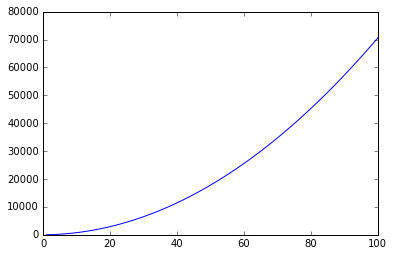

In [2]:
n = np.linspace(1, 100)
plt.plot(n, 7 * n * n + 6 * n + 5)
plt.show()

Now, let us add a function $20n$ to the previous example to visualize that $20n$ grows slower than $7n^2+6n+5$.

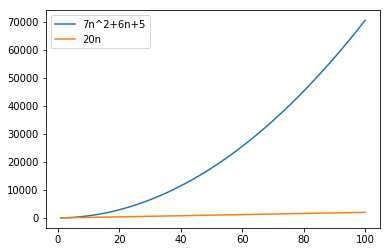

In [2]:
n = np.linspace(1, 100)
plt.plot(n, 7 * n * n + 6 * n + 5, label="7n^2+6n+5")
plt.plot(n, 20 * n, label="20n")
plt.legend(loc='upper left')
plt.show()

## Common rules

Before proceeding with visualizations, let's review the common rules of comparing the order of growth of functions arising frequently in algorithm analysis.

1. Multiplicative constants can be omitted: $c \cdot f \preceq f$. Examples: $5n^2 \preceq n^2$, $\frac{n^2}{3} \preceq n^2$.
2. Out of two polynomials, the one with larger degree grows faster: $n^a \preceq n^b$ for $0 \le a \le b$. Examples: $n \prec n^2$, $\sqrt{n} \prec n^{2/3}$, $n^2 \prec n^3$, $n^0 \prec \sqrt{n}$.
3. Any polynomial grows slower than any exponential: $n^a \prec b^n$ for $a \ge 0, b>1$. Examples: $n^3 \prec 2^n$, $n^{10} \prec 1.1^n$.
4. Any polylogarithm grows slower than any polynomial: $(\log n)^a \prec n^b$ for $a, b>0$. Examples: $(\log n)^3 \prec \sqrt{n}$, $n\log n \prec n^2$.
5. Smaller terms can be ommited: if $f \prec g$, then $f+g\preceq g$. Examples: $n^2+n \preceq n^2$, $2^n+n^9 \preceq 2^n$.

## Rule 5: Smaller terms can be omitted

Consider $7n^2+6n+5$ again. Both $6n$ and $5$ grow slower than $7n^2$. For this reason, they can be omitted. To visualize this, let's first plot the functions $7n^2+6n+5$ and $7n^2$ for $1 \le n \le 5$.

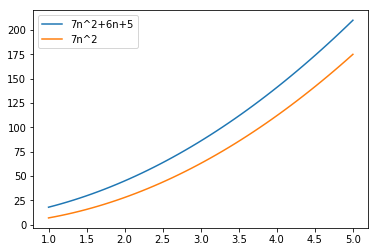

In [3]:
n = np.linspace(1, 5)
plt.plot(n, 7 * n * n + 6 * n + 5, label="7n^2+6n+5")
plt.plot(n, 7 * n * n, label="7n^2")
plt.legend(loc='upper left')
plt.show()

As expected, $7n^2+6n+5$ is always larger than $7n^2$ (as $n$ is positive). Next, we plot the same two functions but for $1 \le n \le 100$.

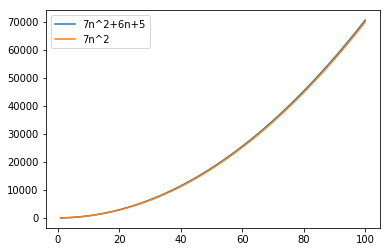

In [4]:
n = np.linspace(1, 100)
plt.plot(n, 7 * n * n + 6 * n + 5, label="7n^2+6n+5")
plt.plot(n, 7 * n * n, label="7n^2")
plt.legend(loc='upper left')
plt.show()

We see that as $n$ grows, the contribution of $6n+5$ becomes more and more negligible.

Another way of justifying this, is to plot the function $\frac{7n^2+6n+5}{7n^2}$.

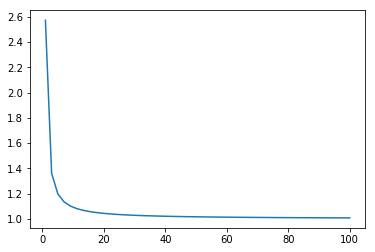

In [5]:
x = np.linspace(1, 100)
plt.plot(n, (7 * n * n + 6 * n + 5)/(7 * n * n))
plt.show()

As we see, as $n$ grows, the fraction approaches 1.

## Rule 1: Multiplicative constants can be ommitted

In terms of big-O notation, $7n^2+6n+5=O(n^2)$, i.e., $7n^2+6n+5$ grows no faster than $n^2$. This again can be visualized by plotting their fraction. As we see, their fraction is always at most 18 and approaches 7. In other words, $7n^2+6n+5 \le 18n^2$ for all $n \ge 1$.

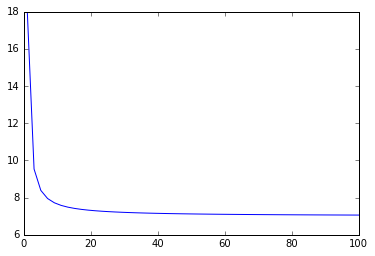

In [7]:
n = np.linspace(1, 100)
plt.plot(n, (7 * n * n + 6 * n + 5)/(n * n))
plt.show()

## Rule 2: Out of two polynomials, the one with larger degree grows faster

For constants $a > b > 0$, $n^a$ grows faster than $n^b$. This, in particular, means that $n^b=O(n^a)$. To visualize it, let's plot $n$, $n^2$, and $n^3$.

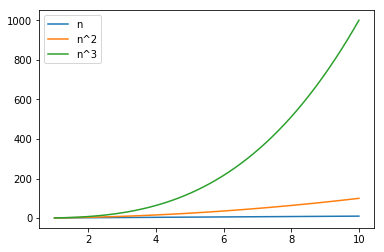

In [6]:
n = np.linspace(1, 10)
plt.plot(n, n, label="n")
plt.plot(n, n * n, label="n^2")
plt.plot(n, n * n * n, label="n^3")
plt.legend(loc='upper left')
plt.show()

Let's now see what happens on a bigger scale: instead of the range $1 \le n \le 10$, consider the range $1 \le n \le 100$.

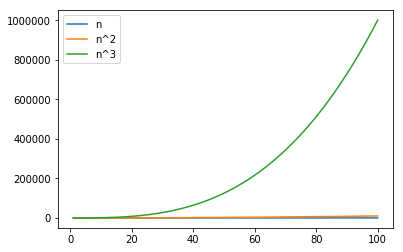

In [7]:
n = np.linspace(1, 100)
plt.plot(n, n, label="n")
plt.plot(n, n * n, label="n^2")
plt.plot(n, n * n * n, label="n^3")
plt.legend(loc='upper left')
plt.show()

## Rule 3: Any polynomial grows slower than any exponential

Let's plot $n^4$ and $2^n$ in the range $1 \le n \le 10$.

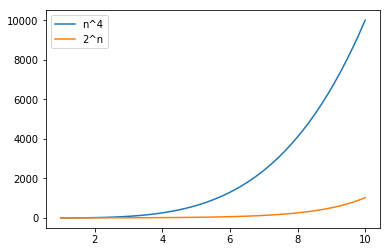

In [8]:
n = np.linspace(1, 10)
plt.plot(n, n ** 4, label="n^4")
plt.plot(n, 2 ** n, label="2^n")
plt.legend(loc='upper left')
plt.show()

The plot reveals that in this range $n^4$ is always greater than $2^n$. This however does not mean that $n^4$ grows faster than $2^n$! To ensure this, let's take a look at a larger range $1 \le n \le 20$.

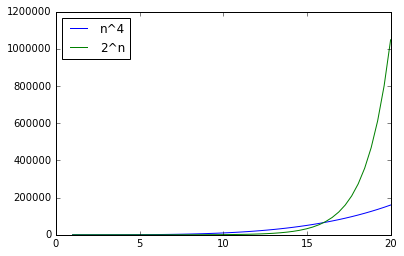

In [11]:
n = np.linspace(1, 20)
plt.plot(n, n ** 4, label="n^4")
plt.plot(n, 2 ** n, label="2^n")
plt.legend(loc='upper left')
plt.show()

## Rule 4: Any polylogarithm grows slower than any polynomial

To visualize this rule, we start by plotting the two most standard representatives: $\log n$ and $n$. The following plot shows that $\log n$ indeed grows slower than $n$.

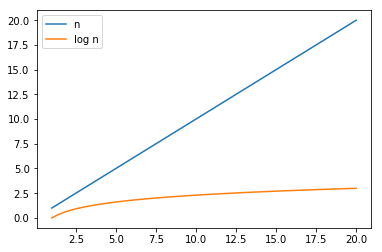

In [9]:
n = np.linspace(1, 20)
plt.plot(n, n, label="n")
plt.plot(n, np.log(n), label="log n")
plt.legend(loc='upper left')
plt.show()

Now consider a more exotic example: $(\log n)^3$ versus $\sqrt{n}$ (recall that $\sqrt{n}$ is a polynomial function since $\sqrt{n}=n^{0.5}$).

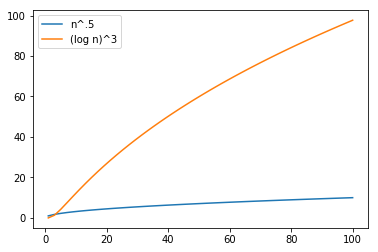

In [10]:
n = np.linspace(1, 100)
plt.plot(n, n ** .5, label="n^.5")
plt.plot(n, np.log(n) ** 3, label="(log n)^3")
plt.legend(loc='upper left')
plt.show()

This looks strange: it seems that $(\log n)^3$ grows faster than $\sqrt{n}$. Let's do the standard trick: increase the range from $[1,100]$ to, say, $[1, 1\,000\,000]$.

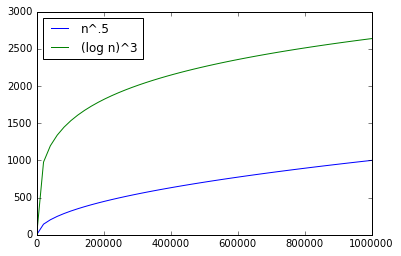

In [14]:
n = np.linspace(1, 10 ** 6)
plt.plot(n, n ** .5, label="n^.5")
plt.plot(n, np.log(n) ** 3, label="(log n)^3")
plt.legend(loc='upper left')
plt.show()

Surprisingly, the logaritmic function is still above the polynomial one! This shows that it is in fact dangerous to decide which function grows faster just by looking at how they behave for some not so large values of $n$. The rule "any polynomial grows faster than any polylogarithm" means that **eventually** the polynomial function will become larger and larger than polylogarithmic. But the rule does not specify for what value of $n$ this happens for the first time. 

To finally ensure that $\sqrt{n}$ outperforms $(\log n)^3$ eventually, let's increase the range to $10^8$.

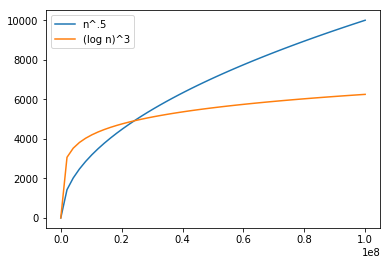

In [12]:
n = np.linspace(1, 10 ** 8)
plt.plot(n, n ** .5, label="n^.5")
plt.plot(n, np.log(n) ** 3, label="(log n)^3")
plt.legend(loc='upper left')
plt.show()

Also, let's consider an even large interval to make sure that these two functions don't switch back.

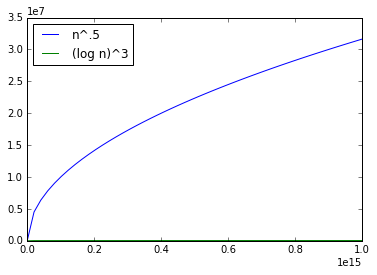

In [16]:
n = np.linspace(1, 10 ** 15)
plt.plot(n, n ** .5, label="n^.5")
plt.plot(n, np.log(n) ** 3, label="(log n)^3")
plt.legend(loc='upper left')
plt.show()

## Exercise

As the final exercise, try to find the value of $n$ where $n^{0.1}$ becomes larger than $(\log n)^5$.

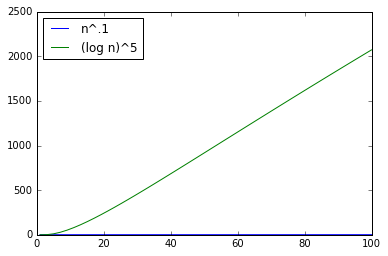

In [17]:
n = np.linspace(1, 100)
plt.plot(n, n ** .1, label="n^.1")
plt.plot(n, np.log(n) ** 5, label="(log n)^5")
plt.legend(loc='upper left')
plt.show()